# Abstract 

This report attempts to delve deeper into the ubiquitous least squares approach to find, essential, a linear fit of data. Scientific python is made use of to implement the least squares method and to evaluate the suitability of models that are used to fit the Bessel function. A further assessment is made of the sampling of observations and the effect of noise. 

# Introduction 

In this study of the least squares method of determining parameters to fit a function to data, the Bessel function of the first kind is modeled. The Bessel function is a solution of the following differential equation
\begin{equation}
x^2y^{\prime\prime} + xy^{\prime} + (x^2- \nu^2)y = 0
\end{equation}
and is denoted by $J_\nu(x)$. Only the bessel function of the first kind, i.e $\nu$ = 1 is modeled here. A good approximation to Bessel functions at high values of $x$ is the following 

\begin{equation}
J_\nu(x) \approx \sqrt{\frac{2}{\pi x}}cos\left(x-\frac{\nu\pi}{2}- \frac{\pi}{4}\right)
\end{equation}

The least squares approach is used to model both the above function and an inaccurate model and a comparision is made by estimating the value of $\nu$. A further analysis is conducted to better understand the effect of random noise and sampling.

# Methods and results 

The following block of code makes the necessary imports from the Scipy and the Numpy libraries and removes the ambiguity around the \ operator in python.

In [1]:
from __future__ import division 
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j1
size= (10,8)

The following code helps define helper funcitons and the models that used later. The $modelb$ and the $modelc$ functions take three arguments- $x$, $x_0$, $eps$. $x$ is the vector of values of the independent variable where the function is sampled. $x_0$ indicates the sample after which values from $x$ are considered for the fitting. $eps$ is the factor by which noise is multiplied. 

In [2]:
# function definition

def modelb_fit(A,B,x):
    return A*np.cos(x)+B*np.sin(x)

def modelc_fit(A,B,x):
    return (A*np.cos(x)+B*np.sin(x))/np.sqrt(x)

def modelhigh(x):
    return np.sqrt(2/(np.pi*x))*np.cos(x- 3*np.pi/4)

def findphi(b):
    return np.arccos((b[0])/(np.sqrt(np.sum(b**2))))

def findnu(phi):
    return ((phi-(np.pi / 4))/(np.pi/2))

def modelb(x,x0,eps):
    i= np.where(x==x0)[0][0]
    vector= x[i:]
    j1_vector= j1(x[i:])
    j1_vector= j1_vector+ eps*np.random.random(len(j1_vector))
    A= np.zeros((len(vector),2))
    
    A[:,0]= np.cos(vector)
    A[:,1]= np.sin(vector)
    b= np.linalg.lstsq(A,j1_vector)[0]
    phi= findphi(b)
    nu= findnu(phi)
    return (nu,b[0],b[1])

def modelc(x,x0,eps):
    i= np.where(x==x0)[0][0]
    vector= x[i:]
    j1_vector= j1(x[i:]) 
    j1_vector= j1_vector+ eps*np.random.random(len(j1_vector))
    A= np.zeros((len(vector),2))
    
    A[:,0]= np.cos(vector)/np.sqrt(vector)
    A[:,1]= np.sin(vector)/np.sqrt(vector)
    b= np.linalg.lstsq(A,j1_vector)[0]
    phi= findphi(b)
    nu= findnu(phi)
    return (nu,b[0],b[1])

def calcnu(x,x0,eps,model):
    return model(x,x0,eps)

A vector $x$ of 41 values is created and a plot of the $J_1$ function is created for reference. Plotting the approximation from Eqn(2), it is seen to be a good approximation at higher values of $x$.

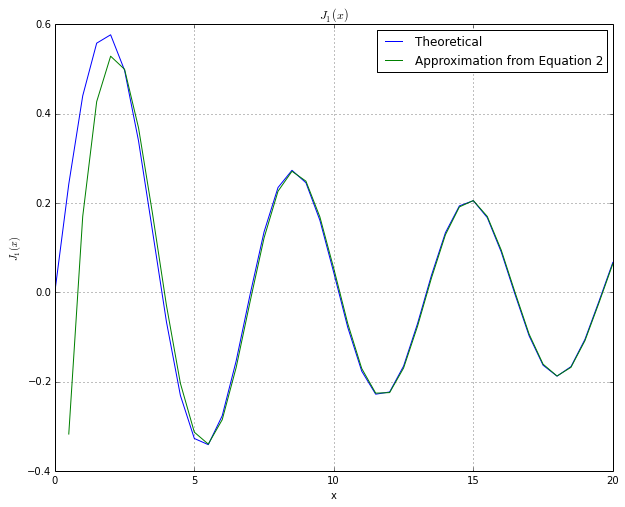

In [3]:
x= np.linspace(0,20,41)
j1_x= j1(x)

plt.figure(1,figsize=size)
plt.plot(x,j1_x, label="Theoretical")
plt.plot(x[1:],modelhigh(x[1:]), label= "Approximation from Equation 2")
plt.xlabel("x")
plt.ylabel("$J_1(x)$")
plt.grid(True)
plt.title("$J_1(x)$")
plt.legend()
plt.show()
plt.close()

The following models are implemented to approximate the Bessel function 
\begin{align}
J_1(x_i) &\approx Acos(x_i) + Bsin(x_i)\\
J_1(x_i) &\approx A\frac{cos(x_i)}{\sqrt{x}} + B\frac{sin(x_i)}{\sqrt{x}}
\end{align}

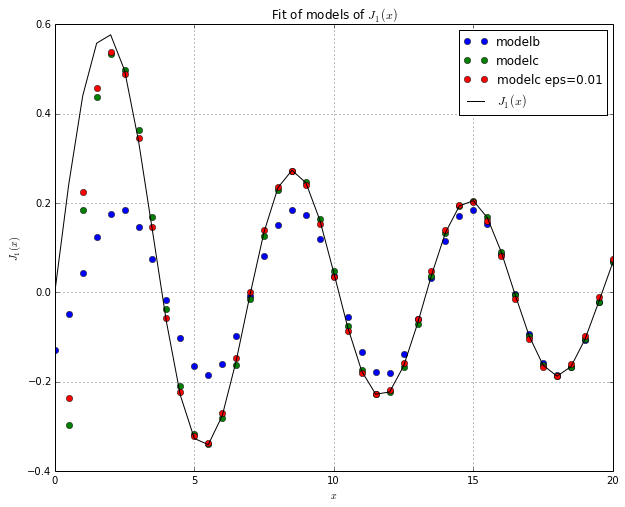

In [4]:
nub=[]
nuc=[]
nucn=[]
val=[]
for x0 in x[1:-4]:
    model_b= calcnu(x,x0,0,modelb)
    nub.append(model_b[0])
    model_c= calcnu(x,x0,0,modelc)
    nuc.append(model_c[0])
    model_cn= calcnu(x,x0,0.01,modelc)
    nucn.append(model_cn[0])
    val.append(x0)

plt.figure(2, figsize= size)
plt.plot(x,modelb_fit(model_b[1],model_b[2],x), "bo",label= "modelb")
plt.plot(x[1:], modelc_fit(model_c[1],model_c[2],x[1:]), "go",label=
        "modelc")
plt.plot(x[1:], modelc_fit(model_cn[1],model_cn[2],x[1:]),"ro", label=
         "modelc eps=0.01")
plt.plot(x, j1_x, "k-", label="$J_1(x)$")
plt.title("Fit of models of $J_1(x)$")
plt.xlabel("$x$")
plt.ylabel("$J_1(x)$")
plt.legend()
plt.grid(True)

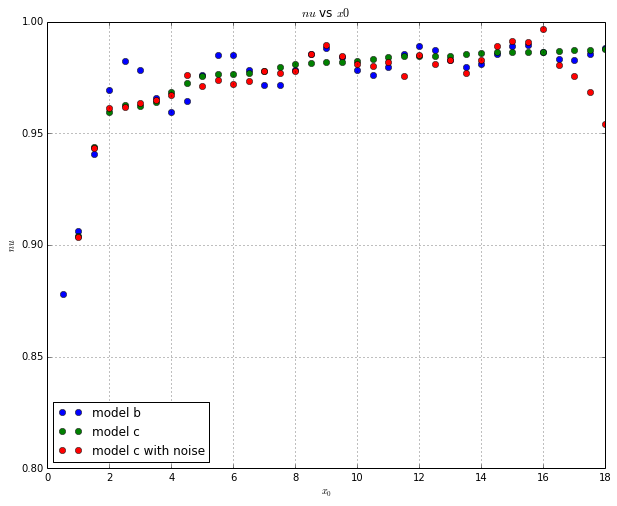

In [9]:
plt.figure(figsize=size)
plt.plot(val,nub,"bo",label="model b")
plt.plot(val,nuc,"go",label="model c")
plt.plot(val,nucn,"ro",label="model c with noise")
plt.legend(loc=3)
plt.xlabel("$x_0$")
plt.ylabel("$nu$")
plt.title("$nu $ vs $x0$")
plt.grid(True)
plt.show()
plt.close()

It is clear that the model from Eqn(4) (modelc) is a much better fit than the model from Eqn(3) (modelb). This is true even when noise is added to the measurements. This is also evident from the the plot of $\nu$.

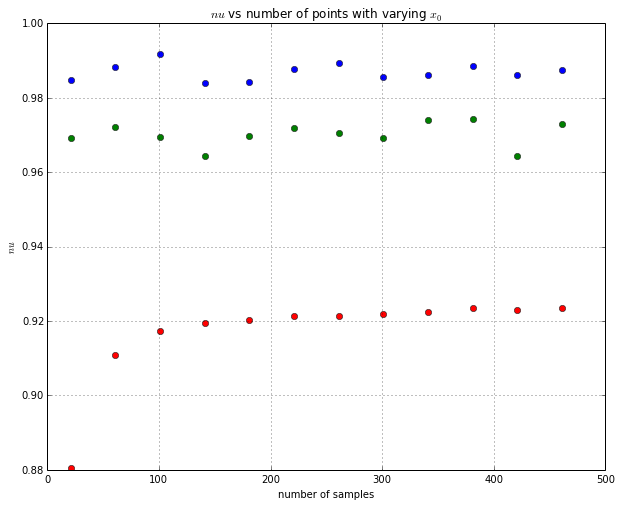

In [8]:
vali=[]
nu=[]
nu1=[]
nu2=[]
for i in range(21,501,40):
    x= np.linspace(0, 20, i)
    vali.append(i)
    nu.append(calcnu(x,1,0.01,modelc)[0])
    nu1.append(calcnu(x,16,0.01,modelc)[0])
    nu2.append(calcnu(x,18,0.01,modelc)[0])
plt.figure(figsize = size)
plt.plot(vali, nu, "ro", label = "$x0 = 1$")
plt.plot(vali, nu1, "bo", label = "$x0 = 16$")
plt.plot(vali, nu2, "go", label = "$x0 = 18$")
plt.xlabel("number of samples")
plt.ylabel("$nu$")
plt.title("$nu$ vs number of points with varying $x_0$")
plt.grid(True)
plt.show()
plt.close()

The closeness of $\nu$ to one increases with the value of $x_0$ until around 16 and then drops as we approach 18 with 20 being the last point in the vector. Further, the general trend seems to be that the value of $\nu$ tends to be one with increasing number of samples.


# Discussion and conclusion-

From figure(2) it can be seen that the method of least squares is indeed very suitable for estimating parameters that contribute linearly to a model. In fact it can be shown that the estimators determined by the least squares approach are minimum variance, unbiased estimators. As can be seen from Figure 2 and Figure 3, this is a powerful method of estimation given the right model. However it can not cope with incorrect models and will try to fit the given samples in the best way possible which results, in this case, in only a sinusoid. 

Considering the fact that any measurement is bound to involve noise the number of measurements determines the effects. As can be seen from Figure 4, increasing the number of measurements has little impact on the value of $\nu$ so long as they are sufficiently large to cancel out the noise. However, it is noteworthy that increasing the value of $x_0$ significantly increases the value of $\nu$ until $x_0 = 16$ after which it begins to decline as the number of samples are simply insufficient to cancel out the random noise.

Since the noise is assumed to be random, small $x_0$ ensures no bias as the noise is averaged out, however fitting a model that is better suited to higher values of $x_i$ becomes hard. However, at higher $x_0$, even though the although least squares produces the best fit, the effect of noise is much more apparent.

In conclusion, the libraries Scipy and Numpy have been used to implement the least squares approach and to study the effect of noise, sampling and various models.